# 신경망의 사용처
* 신경망은 분류, 회귀 모두 사용하다.
  * 출력층의 **활성화 함수**에 따라서 목적(사용처)이 달라진다. ( 분류를 할지, 회귀를 할지 )
  * 회귀에서는 항등 함수를 사용하면 회귀가 된다.
* 소프트맥스나 시그모이드 함수를 활용하면 분류
  * 시그모이드는 사용처가 정해져 있음
    * 결괏값을 **확률**로 표현하고 싶을 때 사용한다.
    * 예를 들면 89.12% 확률로 부정적인 리뷰 입니다.
  * 소프트맥스 함수를 주로 분류용 활성화 함수로 사용한다.

# 소프트맥스 함수 구현하기
$$
y_k = \frac{e^{z_k}}{\sum_{i=0}^{n-1} e^{z_i}}
$$

* $k$ : $k$번째 출력 ( 클래스 번호 ) 0, 1, 2 ....
* $z$ : 출력층에 있는 뉴런의 $WX+b$ 연산
* $n$ : 전체 클래스의 개수

In [ ]:
import numpy as np

z = np.array([0.3, 2.9, 4.0])

# 분자 부분 계산
exp_z = np.exp(z)

# 분모 부분 계산
sum_exp_z = np.sum(exp_z)

# 소프트맥스를 적용한 최종 예측값
y = exp_z / sum_exp_z
print("softmax의 결과 : {}".format(y))

softmax의 결과 : [0.01821127 0.24519181 0.73659691]


In [ ]:
print("softmax의 총 합은 : {}".format(np.sum(y)))

softmax의 총 합은 : 1.0


## softmax의 특징
1. 어떠한 실수 배열이 softmax를 지나게 되면 그 배열의 총합이 언제나 1.0이 된다.
2. 총 합이 1.0 이라는 것의 특징 : 각각의 확률로 설명이 가능하다.

### 소프트맥스 함수는 단조함수이다.
```python
Z = [3.1, 18.3, 10.3]
Z[0] < Z[2] < Z[1] 일 때

y = softmax(Z)
y[0] < y[2] < y[1] 순서가 유지 된다.

소프트맥스 함수를 지나도 부등호의 순서가 그대로 유지되는 것
이러한 특징을 단조함수의 특징이라고 한다.
```

In [ ]:
def softmax(z):
  exp_z = np.exp(z) # 분자
  sum_exp_z = np.sum(exp_z) # 분모
  y = exp_z / sum_exp_z

  return y

In [ ]:
softmax(z)

array([0.01821127, 0.24519181, 0.73659691])

# 소프트맥스 함수 튜닝
* 소프트맥스 함수는 자연상수 $e$의 지수 함수
* 입력값이 조금만 커져도 굉장히 큰 값을 연산을 한다.
* 예시
  * $e^{10}$만 되어도 20000이 넘는 수
  * $e^{100}$은 0이 40개가 넘는 큰 숫자
  * $e^{1000}$은 무한대를 의미하는 `inf`

In [ ]:
big_z = [1000, 900, 1100]
softmax(big_z)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: RuntimeWarning: overflow encountered in exp
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: RuntimeWarning: invalid value encountered in true_divide
  after removing the cwd from sys.path.


array([nan, nan, nan])

수학적인 기교로 튜닝이 가능하다.
$$
y_k = \frac{exp(a_k)}{\sum_{i=1}^n exp(a_i)} = \frac{C\,exp(a_k)}{C\,\sum_{i=1}^n exp(a_i)} = \frac{exp(a_k+logC)}{\sum_{i=1}^n exp(a_i+logC)} = \frac{exp(a_k+C^\prime)}{\sum_{i=1}^n exp(a_i+C^\prime)} 
$$

In [ ]:
c = np.max(big_z)
print(big_z + (-c))

[-100 -200    0]


In [ ]:
# 튜닝된 소프트 맥스
def softmax(z):
  c = np.max(z) # 상수로 결정되는 C는 원소들 중 최대값을 기준으로 한다.

  exp_z = np.exp(z-c)
  sum_exp_z = np.sum(exp_z)

  y = exp_z / sum_exp_z
  return y

In [ ]:
softmax(big_z)

array([3.72007598e-44, 1.38389653e-87, 1.00000000e+00])

튜닝은 어려우시면 패스 하세요!

**소프트맥스의 의미만 잘 파악하자!!**

# 출력층의 뉴런 수 정하기
* 출력층의 뉴런 개수는 **분류하고 싶은 클래스의 개수대로 설정하면 된다**
  * 첫 번째 모델 : `강아지, 고양이, 말`을 분류하는 모델을 만들고 싶다 -> 3
  * 두 번째 모델 : `강아지, 고양이`를 분류하는 모델을 만들고 싶다. -> 2개 일 수도 있고 1개 일 수도 있고
    * 2개를 놓을 때는 softmax를 쓰면 된다.
    * 1개를 놓을 때는 sigmoid를 쓰면 된다.
  * 세 번째 모델 : 손글씨 숫자 데이터 `0~9` 까지를 분류하는 모델을 만들고 싶다 -> 10

# MNIST 손글씨 데이터셋 분류 추론 모델 만들기

## 텐서플로우 MNIST 데이터 불러오고 형상 다루기

In [ ]:
import tensorflow as tf
import matplotlib.pyplot as plt

In [ ]:
# mnist 데이터 세트 로딩
from tensorflow.keras import datasets
mnist = datasets.mnist

In [ ]:
# 사이킷런의 train_test_split이 아님!
(X_train, y_train), (X_test, y_test) = mnist.load_data()

11493376/11490434 [==============================] - 0s 0us/step


⭐️⭐️⭐️데이터의 형상 부터 확인하자⭐️⭐️⭐️

In [ ]:
X_train.shape

(60000, 28, 28)

In [ ]:
y_train.shape

(60000,)

첫 번째 이미지 데이터만 가져오기

In [ ]:
image = X_train[1]
image.shape

(28, 28)

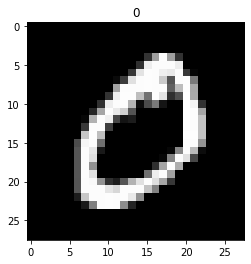

In [ ]:
# matplotlib을 이용해서 이미지 시각화
plt.imshow(image, 'gray')
plt.title(y_train[1])
plt.show()

데이터를 신경망에 넣을 준비 - 훈련, 테스트 모두 동일한 데이터의 feature의 개수를 가져야 한다.
* 신경망은 평평하게 펴진 1차원 배열을 입력으로 받고 있다.
* 즉 지금 우리가 사용할 신경망에 집어 넣을 데이터 1개의 형상은 1차원 배열 형태로 들어가야 한다.
* 평평하게 펴진 데이터를 기반으로 예측을 수행하는 레이어
  * 신경망 - Dense Layer
  * 기하학 - Affine Layer
  * 통합적 - F.C Layer ( Fully Connected Layer ) - 전결합( 완전 연결 계층 )
------
신경망에 이미지 데이터를 입력할 수 있는 경우 확인하기
* 장수에 대한 정보 없이 가로 세로 픽셀에 대한 정보만 있는 상황 : `(28, 28)` -> X
* 장수에 대한 정보 없이 평탄화 시킨 상황 : `(784, )` -> O(일단은 허용. Tensorflow나 Pytorch 같은 머신러닝 라이브러리에서는 허용 X)
-----
`60000`장의 이미지 데이터가 `(28, 28)`인 경우. 즉 `(60000, 28, 28)`
* 장수 데이터가 있는 상태에서 가로 세로 픽셀에 대한 정보만 있는 상황 : `(60000, 28, 28)` -> X
* 장수 데이터가 있는 상태에서 평탄화 시킨 상황 : `(60000, 784)` -> O
------
입력되는 데이터의 차원이 `(N, M)`이면 신경망 F.C 레이어에 집어 넣을 수 있다.
* `N` : BATCH_SIZE( 데이터의 개수 )
* `M` : 데이터 스칼라의 개수
  * 배치를 이야기 하지 않는 경우 : `(M, )`
  * 배치를 이야기 하면 : `(N, M)`
  
**참고로 CNN은 Fully Connected Layer가 아니고, 2차원 배치 데이터를 사용하지 않기 때문에 (N, H, W, C)가 됩니다.**

In [ ]:
# 신경망에 들어가는 형태로 배열 편집

# 1. flatten을 활용한 평탄화
image = X_train[0].flatten()
image.shape

(784,)

In [ ]:
# 2. ravel을 활용한 평탄화 ( 잘 사용되어지는 방법은 아니에요. ) 이유 : 원본 이미지 데이터가 훼손될 우려가 있다.
image = np.ravel(X_train[0])
image.shape

(784,)

In [ ]:
# 3. reshape을 활용한 평탄화 : 이게 제일 많이 쓰인다. 원하는 형식으로 자유롭게 바꿀 수 있어서
image = X_train[0].reshape(-1)
image.shape

(784,)

In [ ]:
# 텐서플로우나 파이토치 같은 프레임워크에 집어 넣기 위해서 변경하려면?
X_train[0].reshape(1, -1).shape

(1, 784)

In [ ]:
X_train.shape

(60000, 28, 28)

In [ ]:
X_train.reshape(60000, -1).shape

(60000, 784)

MNIST 손글씨 데이터세트를 위한 신경망 만들기 - Fully Connected Layer

In [ ]:
def sigmoid(x):
  return 1 / (1 + np.exp(-x))

# 테스트 데이터만 가져오기
def get_test_data():
  _, (X_test, t_test) = mnist.load_data()

  # YOUR CODE HERE
  # 단순히 X_test로 리턴하는게 아닌 (N, M) 형태로 리턴하기

  IMAGE_COUNT = X_test.shape[0] # shape[0] : 이미지개수 (X_test.shape -> (10000,28,28))
  
  X_test_reshaped = X_test.reshape(IMAGE_COUNT, -1)

  return X_test_reshaped, t_test

# 이미 학습이 완료된 신경망 데이터 가져오기(sample_weight.pkl)
def init_network():
  import pickle
  with open("./sample_weight.pkl", "rb") as f:
    network = pickle.load(f)
  
  return network

def predict(network, x):
  # YOUR CODE HERE
  W1, W2, W3 = network["W1"], network["W2"], network["W3"]
  b1, b2, b3 = network["b1"], network["b2"], network["b3"]

  # 1. 각 층은 입력되는 값과 해당 층의 가중치의 내적을 구하고 편향을 더한다.
  # 2. (1)에서 계산된 값과 각 층의 활성화 함수를 씌워주고 다음층으로 넘겨준다.

  # Layer 1 계산 ( 입력 : x, 가중치 : W1, 편향 : b1, 활성화 함수 : sigmoid, 출력 A1 )
  z1 = x @ W1 + b1
  a1 = sigmoid(z1)

  # Layer 2 계산 ( 입력 : a1, 가중치 : W2, 편향 : b2, 활성화 함수 : sigmoid, 출력 A2)
  z2 = a1 @ W2 + b2
  a2 = sigmoid(z2)

  # Layer 3 계산 ( 입력 : a2, 가중치 : W3, 편향 : b3, 활성화 함수 : 출력층이기 때문에 softmax, 출력 y)
  z3 = a2 @ W3 + b3
  y = softmax(z3)

  # 출력층의 활성화 함수는? softmax를 사용하세여
  return y

`sample_weight.pkl`에는 3층 신경망의 매개변수가 들어 있음

* W1, W2, b1, b2는 은닉층
* W3, b3는 출력층

In [ ]:
network = init_network()
W1, W2, W3 = network["W1"], network["W2"], network["W3"]
b1, b2, b3 = network["b1"], network["b2"], network["b3"]

W1.shape, W2.shape, W3.shape

((784, 50), (50, 100), (100, 10))

이미지 한장만 예측(predict)

In [ ]:
# 테스트 데이터 가지고 오기
X, t = get_test_data()

# 한장만 가져와서 테스트
test_image, test_target = X[0], t[0]

test_image.shape

(784,)

In [ ]:
# 네트워크 불러오기
net = init_network()

test_result = predict(net, test_image)

# test_result에는 softmax의 결과물이 들어있음
#   test_result에 대한 10개 숫자 각각의 확률
#   [0 번 클래스 확률, 1번 클래스 확률, 2번 클래스 확률, ...,  9번 클래스 확률]
print("예측된 softmax 결과 : \n{}".format(test_result))
print("예측된 label 확인 : {}".format(np.argmax(test_result))) # argamx : 배열에서 가장 값이 큰 곳의 인덱스를 리턴
print("정답 : {}".format(test_target))

예측된 softmax 결과 : 
[4.2879005e-06 4.5729317e-07 1.8486280e-04 8.3605024e-05 1.5084674e-07
 6.3182205e-07 4.5782045e-10 9.9919468e-01 3.8066935e-07 5.3083024e-04]
예측된 label 확인 : 7
정답 : 7


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: RuntimeWarning: overflow encountered in exp
  


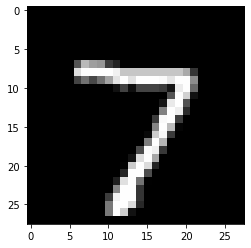

In [ ]:
# test_image가 7이 맞는지 이미지로 확인
# 이미지로 표시하기 위해서 test_image를 (28, 28)로 변환 시켜주기
plt.imshow(test_image.reshape(28, 28), 'gray')
plt.show()

# 예측에 대한 정확도 확인
한 장씩 예측해서 정확도 확인하기

In [ ]:
X, t = get_test_data()

net = init_network()
acc_count = 0 # 정답을 맞춘 개수를 저장 (10000만 중에 500장 맞았으면 500, 9000장 맞았으면 9000)

# X에서 사진을 하나씩 꺼내서 테스트
for i in range(len(X)):
  pred = predict(net, X[i]) # pred의 shape : (10, )
  pred = np.argmax(pred) # 확률이 가장 높은 원소의 인덱스

  # 예측한 것과 정답이 같으면
  # if pred == t[i]:
  #   acc_count += 1

  acc_count += (pred == t[i])

print(float(acc_count / len(X)))

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: RuntimeWarning: overflow encountered in exp
  


0.9207


위 코드의 단점
  * 10,000장의 이미지를 한장식 예측을 하고 있다.
  * 시간이 오래걸린다는 이야기이다.

어떻게 해결할 수 있을까?
  * **BATCH**를 사용해서 한장씩이 아닌 데이터의 묶음으로 예측을 하게 하겠다.
  * 배치 : 데이터의 뭉터기

In [ ]:
# 배치를 이용한 예측
X, t = get_test_data()

net = init_network()

# 배치란? 데이터의 묶음
# batch_size : 1 배치당 들어있어야 하는 데이터의 개수
# 60,000개의 데이터를 batch_size 100으로 묶으면 몇 개의 배치가 만들어질까요? 600개의 배치가 만들어 진다.

batch_size = 100
acc_count = 0

for i in range(0, len(X), batch_size):
  X_batch = X[i : i + batch_size] # X_batch의 shape : (100, 784)

  pred_batch = predict(net, X_batch) # pred_batch의 shape : (100, 10)
  pred_batch = np.argmax(pred_batch, axis=1)

  acc_count += np.sum( pred_batch == t[i : i + batch_size])

print(float(acc_count) / len(X))

0.9207


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: RuntimeWarning: overflow encountered in exp
  


`np.argmax`의 `axis`가 1인 이유
1. `softmax`의 결과는 10개의 원소(결과물)를 가진 1차원 배열
2. 그런데 이 결과물이 100개씩 묶음 지어져 있다. (배치)
3. `np.argmax`의 `axis`를 1로 줘야지만 각 행별로 최대값의 인덱스를 구한다.
4. `axis=0`은 2차원 배열 입장에서 1차원 배열이 추가되는 방향이기 때문에...